# SIMULAÇAO DE GRAFOS

* Fernando Tancini - 1711799
* Andrea Mourelo - 1820000

In [122]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from networkx import *
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.2


## Tests

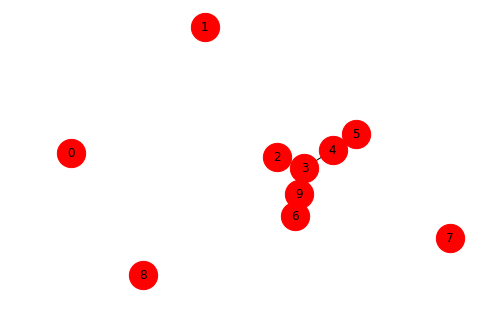

In [38]:
G = dense_gnm_random_graph(10, 5, seed=150)
nx.draw(G, node_size=800, node_color='red', with_labels=True)

[(0, {}),
 (1, {}),
 (2, {}),
 (3, {}),
 (4, {}),
 (5, {}),
 (6, {}),
 (7, {}),
 (8, {}),
 (9, {}),
 (10, {}),
 (11, {}),
 (12, {}),
 (13, {}),
 (14, {}),
 (15, {}),
 (16, {}),
 (17, {}),
 (18, {}),
 (19, {}),
 (20, {}),
 (21, {}),
 (22, {}),
 (23, {}),
 (24, {}),
 (25, {}),
 (26, {}),
 (27, {}),
 (28, {}),
 (29, {}),
 (30, {}),
 (31, {}),
 (32, {}),
 (33, {}),
 (34, {}),
 (35, {}),
 (36, {}),
 (37, {}),
 (38, {}),
 (39, {}),
 (40, {}),
 (41, {}),
 (42, {}),
 (43, {}),
 (44, {}),
 (45, {}),
 (46, {}),
 (47, {}),
 (48, {}),
 (49, {})]

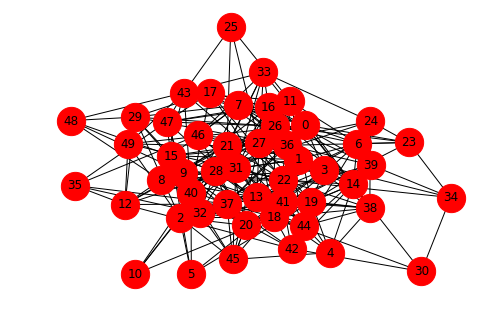

In [53]:
G = gnp_random_graph(50,0.2,seed=150)
nx.draw(G, node_size=800, node_color='red', with_labels=True)
list(G.nodes(data=True))

[(0, {'sick': 0}), (1, {'sick': 0}), (2, {'sick': 0}), (3, {'sick': 0}), (4, {'sick': 0}), (5, {'sick': 0}), (6, {'sick': 0}), (7, {'sick': 0}), (8, {'sick': 0}), (9, {'sick': 0}), (10, {'sick': 0}), (11, {'sick': 0}), (12, {'sick': 0}), (13, {'sick': 0}), (14, {'sick': 0}), (15, {'sick': 0}), (16, {'sick': 0}), (17, {'sick': 0}), (18, {'sick': 0}), (19, {'sick': 0}), (20, {'sick': 0}), (21, {'sick': 0}), (22, {'sick': 0}), (23, {'sick': 0}), (24, {'sick': 0}), (25, {'sick': 0}), (26, {'sick': 0}), (27, {'sick': 0}), (28, {'sick': 0}), (29, {'sick': 0}), (30, {'sick': 0}), (31, {'sick': 0}), (32, {'sick': 0}), (33, {'sick': 0}), (34, {'sick': 0}), (35, {'sick': 0}), (36, {'sick': 0}), (37, {'sick': 0}), (38, {'sick': 0}), (39, {'sick': 0}), (40, {'sick': 0}), (41, {'sick': 0}), (42, {'sick': 0}), (43, {'sick': 0}), (44, {'sick': 0}), (45, {'sick': 0}), (46, {'sick': 0}), (47, {'sick': 0}), (48, {'sick': 0}), (49, {'sick': 0})]


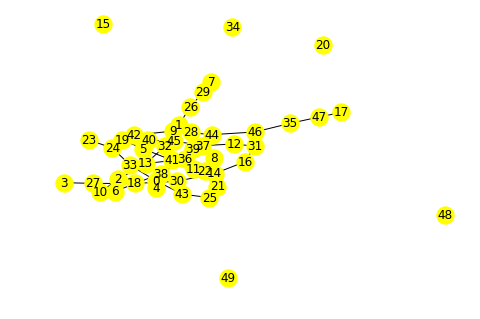

In [71]:
def setGraph(nNodes,pEdge,seed):
    G = gnp_random_graph(nNodes,pEdge,seed=seed)
    nx.set_node_attributes(G, name='sick', values=0)
    nx.draw(G, node_size=300, node_color='yellow', with_labels=True)
    print(list(G.nodes(data=True)))

## First version

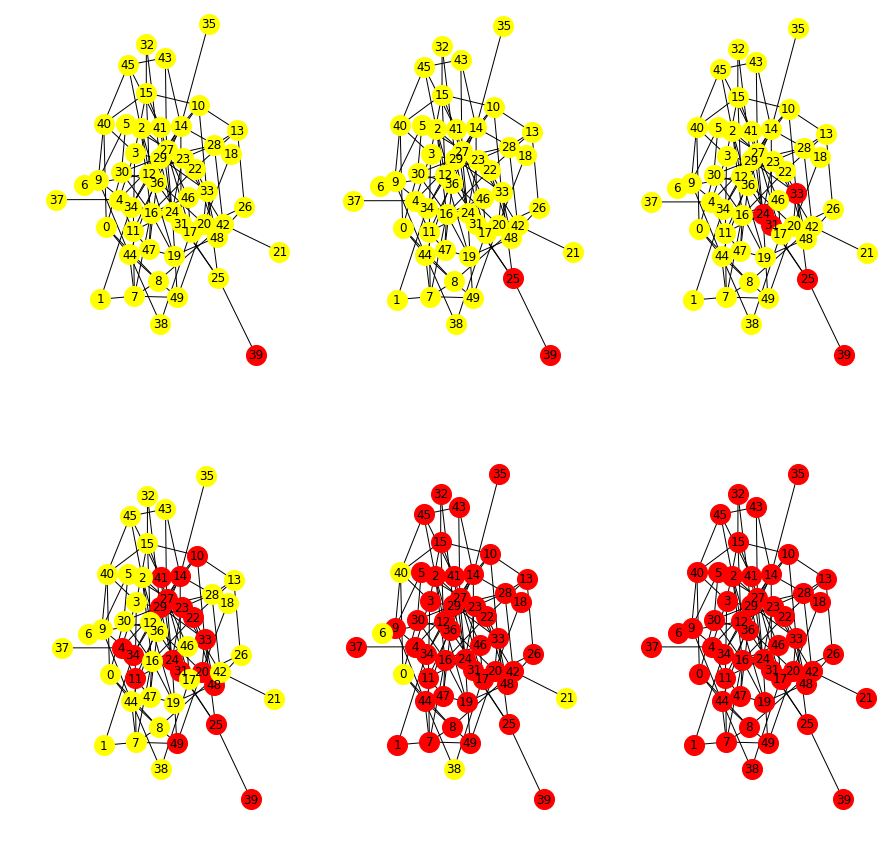

In [178]:
# Função usada para o set up da seed a cada função, pois se não não funcionava
seed_value = 1001004  

def set_seed(seed_value): 
    # 1. Set PYTHONHASHSEED environment variable at a fixed value: 
    import os
    os.environ['PYTHONHASHSEED']=str(seed_value) 
    # 2. Set python built-in pseudo-random generator at a fixed value:
    import random
    random.seed(seed_value) 
    # 3. Set numpy pseudo-random generator at a fixed value:
    np.random.seed(seed_value) 
    
def setGraph(nNodes,pEdge):
    # Sets a random graph with nNodes and pEdge probability of having an edge between 2 nodes
    G = gnp_random_graph(nNodes,pEdge,seed=seed_value)
    nx.set_node_attributes(G, name='sick', values=0) # Setting everyone not sick
    return G
    
def setDisease(G,node):
    # Makes the node "node" become sick
    G.node[node]['sick'] = 1 # becomes sick
    
def getDiseaseGroups(G):
    # Returns two lists, one with the sick nodes and the other with the healthy ones
    sick, notSick = [],[]
    sickness = nx.get_node_attributes(G, 'sick')
    for key,value in sickness.items():
        if (value == 0):
            notSick.append(key)
        else : 
            sick.append(key)
    return sick, notSick

def propagateDisease(G,probaContagion):
    # With a probability probaContagion, propagates the disease (or not) to the neigbors of the sick people
    sick, notSick = getDiseaseGroups(G)
    for node in sick:
        for neigbor in G.neighbors(node):
            u = np.random.sample(1)[0]
            if (u < probaContagion):
                setDisease(G,neigbor)
    
def plotGraph(G,ax,pos_fr):
    # Plots the evolution of the disease distribution
    sick,notSick = getDiseaseGroups(G)
    nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=sick, node_size=400, node_color='red', ax=ax)
    nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=notSick, node_size=400, node_color='yellow',ax=ax)
    nx.draw_networkx_labels(G, pos=pos_fr, labels={n: n for n in G.nodes()},ax=ax)
    nx.draw_networkx_edges(G, pos=pos_fr,ax=ax)
    ax.set_axis_off() # Remove axes
    
def DiseaseExperience(people,probaEdges,experienceTime, probaContagion):
    
    # Setting seed
    set_seed(seed_value)
    
    # Setting the graph
    G = setGraph(people,probaEdges) # with everyone not sick
    
    # Setting the first sick person
    setDisease(G,39)
    
    # Plot settings
    lines = int(experienceTime/3)  # 3 plots per line
    fig, axes = plt.subplots(lines, 3, figsize=(15,15))
    pos_fr = nx.fruchterman_reingold_layout(G) # Kind of layout
    line_plot = 0
    
    # Evolution
    for second in range(experienceTime):
        plotGraph(G,axes[line_plot, second%3],pos_fr)
        propagateDisease(G,probaContagion)
        if (second%3 == 2):
            line_plot += 1

people = 50
probaEdges = 0.1
Time = 6
probaContagion = 1
DiseaseExperience(people,probaEdges,Time, probaContagion)

Ideas : 
    * Vary the probability of contagion
    * Vary the probability of having edges (relationships between people)
    * Vary the starting point of the disease
    * Create clusters (different cities?)
    * Do different states of sickness ( healthy, sick, recovery, sick again ?)

Interesting to read: 

TEORIA
http://www.est.ufmg.br/portal/arquivos/rts/RTE_01_2017.pdf
https://www.teses.usp.br/teses/disponiveis/100/100132/tde-04052015-091411/publico/fmoshecorrigida.pdf
https://www.ppgee.ufmg.br/defesas/350M.PDF (MENOS)


RANDOM GRAPH SIMULATION
https://graph-tool.skewed.de/static/doc/generation.html

EPIDEMYC
https://pyepydemic.readthedocs.io/en/latest/


exemplo civilizations
https://spyhce.com/blog/python-networkx-library
https://github.com/mihaigociu/myrepo/blob/master/networkx_presentation.py
